#Introduction

In this activity, you will build your own Naive Bayes model. Naive Bayes models can be valuable to use any time you are doing work with predictions because they give you a way to account for new information. In today's world, where data is constantly evolving, modeling with Naive Bayes can help you adapt quickly and make more accurate predictions about what could occur.

For this activity, you work for a firm that provides insights for management and coaches in the National Basketball Association (NBA), a professional basketball league in North America. The league is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time. In the previous activity, you analyzed a subset of data that contained information about the NBA players and their performance records. You conducted feature engineering to determine which features would most effectively predict a player's career duration. You will now use those insights to build a model that predicts whether a player will have an NBA career lasting five years or more.

The data for this activity consists of performance statistics from each player's rookie year. There are 1,341 observations, and each observation in the data represents a different player in the NBA. Your target variable is a Boolean value that indicates whether a given player will last in the league for five years. Since you previously performed feature engineering on this data, it is now ready for modeling.

#Step 1: Imports

In [9]:
# Import relevant libraries and modules.

import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

In [10]:
# Load extracted_nba_players_data.csv into a DataFrame called extracted_data.
url = 'https://raw.githubusercontent.com/Illiyas124/LEARN-Learning-program-in-COURSERA/refs/heads/main/extracted_nba_players_data.csv'
extracted_data = pd.read_csv(url)

In [11]:
# Display the first 10 rows of data.
extracted_data.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,0.435294


#Step 2: Model preparation

In [12]:
# Define the y (target) variable.
y = extracted_data['target_5yrs']

# Define the X (predictor) variables.
X = extracted_data.drop('target_5yrs', axis = 1)

In [13]:
# Display the first 10 rows of your target data.
y.head(10)

,target_5yrs
0,0
1,0
2,0
3,1
4,1
5,0
6,1
7,1
8,0
9,0


In [14]:
# Display the first 10 rows of your predictor variables.
X.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,155.4,0.435294


In [15]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
# Print the shape (rows, columns) of the output from the train-test split.
# Print the shape of X_train.
print(X_train.shape)

# Print the shape of X_test.
print(X_test.shape)

# Print the shape of y_train.
print(y_train.shape)

# Print the shape of y_test.
print(y_test.shape)

(1005, 10)
(335, 10)
(1005,)
(335,)


#Step 3: Model building

In [17]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.
nb = naive_bayes.GaussianNB()

# Fit the model on your training data.
nb.fit(X_train, y_train)

# Apply your model to predict on your test data. Call this "y_pred".
y_pred = nb.predict(X_test)

In [18]:
# Print your accuracy score.
print('accuracy score:'), print(metrics.accuracy_score(y_test, y_pred))

# Print your precision score.
print('precision score:'), print(metrics.precision_score(y_test, y_pred))

# Print your recall score.
print('recall score:'), print(metrics.recall_score(y_test, y_pred))

# Print your f1 score.
print('f1 score:'), print(metrics.f1_score(y_test, y_pred))

accuracy score:
0.6895522388059702
precision score:
0.8405797101449275
recall score:
0.5858585858585859
f1 score:
0.6904761904761905


(None, None)

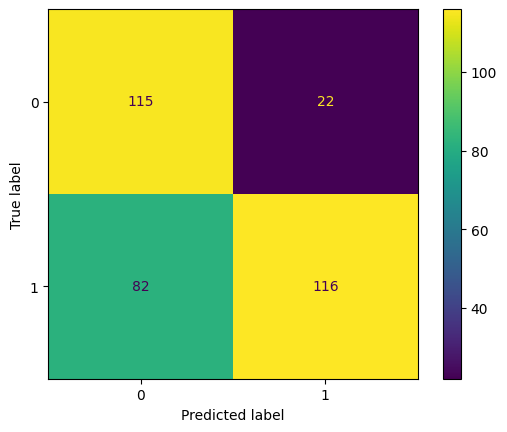

In [19]:
# Construct and display the confusion matrix.
# Construct the confusion matrix for predicted and test values.
cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for the confusion matrix.
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

# Plot the visual in-line.
disp.plot()